In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
df = pd.read_csv("/content/ADANIPORTS (1).csv")
print(df.head())


         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4

In [ ]:
data = df['Close'].values.reshape(-1, 1)

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0123
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 8.3767e-04
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 7.3310e-04
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 5.1474e-04
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 6.5757e-04
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 5.4088e-04
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 4.8530e-04
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 7.9290e-04
Epoch 9/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 5.3231e-04
Epoch 10/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 2.9637e-04


In [ ]:
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


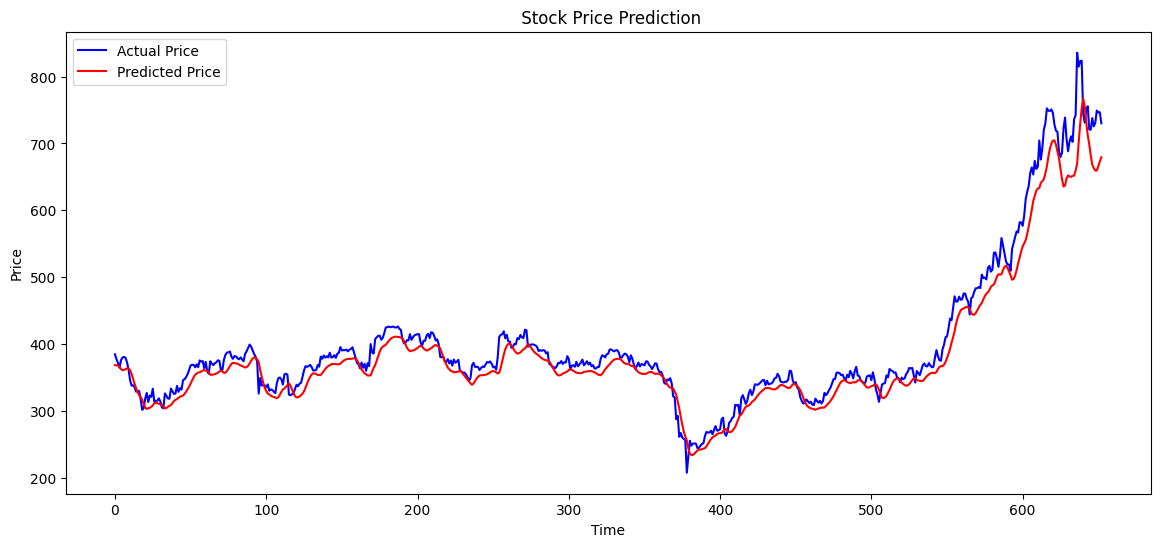

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(actual_prices, color='blue', label='Actual Price')
plt.plot(predicted_prices, color='red', label='Predicted Price')
plt.title(f' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=7baf99c08152b844187240e244a21f332453681bfe7b152915375625820bc151
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [ ]:
import ta

ticker = "/content/ADANIPORTS (1).csv"
df = pd.read_csv(ticker)

df = df.dropna().reset_index(drop=True)

close_prices = df['Close']

df['SMA_20'] = ta.trend.sma_indicator(close_prices, window=20)
df['RSI'] = ta.momentum.rsi(close_prices, window=14)
df['MACD'] = ta.trend.macd_diff(close_prices)

df.dropna(inplace=True)

print(df[['Close', 'SMA_20', 'RSI', 'MACD']].head())


     Close    SMA_20        RSI      MACD
33  154.85  156.5600  44.418887 -0.398588
34  160.40  157.1625  56.367755 -0.062028
35  155.95  157.5550  47.542397 -0.132025
36  157.35  157.9150  50.184899 -0.079540
37  160.75  158.2375  55.983910  0.174780


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

features = ['Close', 'SMA_20', 'RSI', 'MACD']
data = df[features]

scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

def create_sequences(dataset, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(dataset)):
        X.append(dataset[i-seq_length:i])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X_seq, y_seq = create_sequences(scaled, seq_length)

split = int(0.8 * len(X_seq))
X_lstm_train, X_lstm_test = X_seq[:split], X_seq[split:]
y_lstm_train, y_lstm_test = y_seq[:split], y_seq[split:]

X_flat = scaled[seq_length:]
y_flat = scaled[seq_length:, 0]

X_train, X_test, y_train, y_test = train_test_split(X_flat, y_flat, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_lstm_train.shape[1], X_lstm_train.shape[2])),
    LSTM(50),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_lstm_train, y_lstm_train, epochs=10, batch_size=32)

# Predict
lstm_pred = model_lstm.predict(X_lstm_test)
lstm_mse = mean_squared_error(y_lstm_test, lstm_pred)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0138
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 3.7951e-04
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.7350e-04
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.5897e-04
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 2.2668e-04
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 2.5293e-04
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.3559e-04
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.2513e-04
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 1.9200e-04
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 1.9464e-04
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


In [66]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
xgb_pred = model_xgb.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
rf_pred = model_rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)


In [ ]:
print(f"LSTM MSE: {lstm_mse:.6f}")
print(f"XGBoost MSE: {xgb_mse:.6f}")
print(f"Random Forest MSE: {rf_mse:.6f}")

LSTM MSE: 0.001690
XGBoost MSE: 0.000033
Random Forest MSE: 0.000007


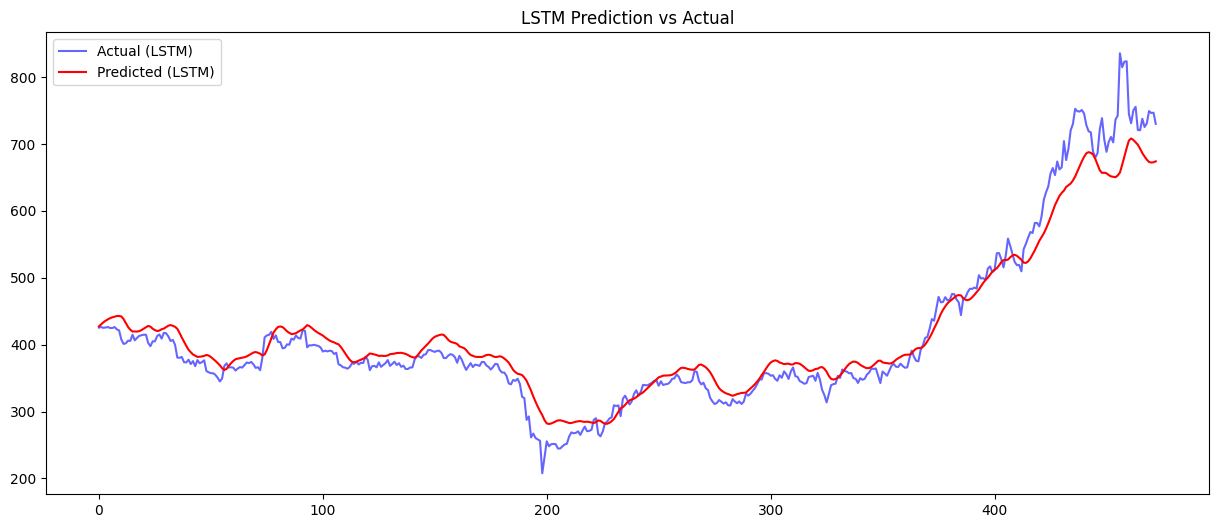

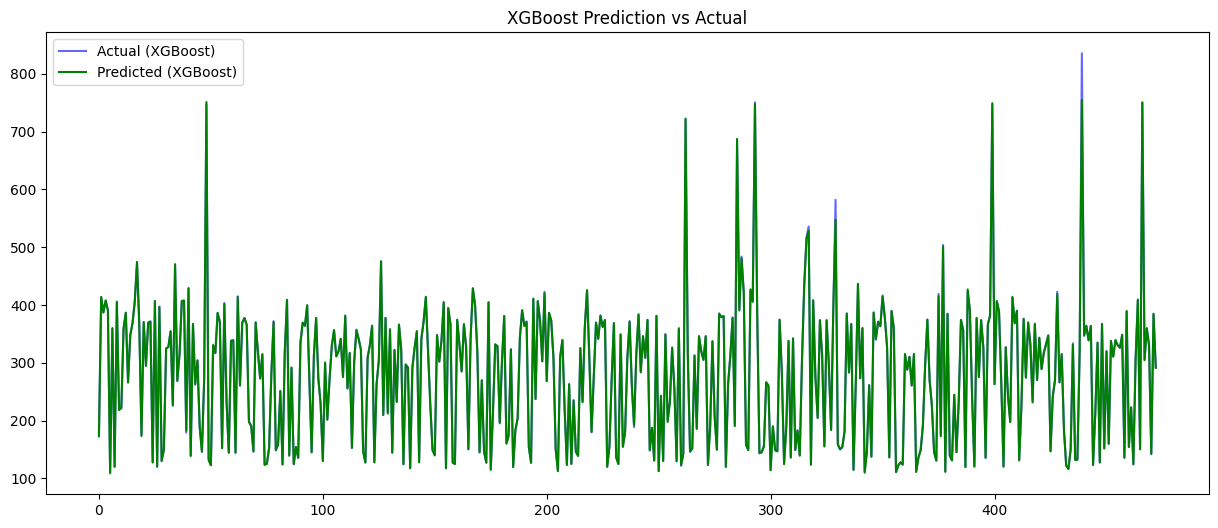

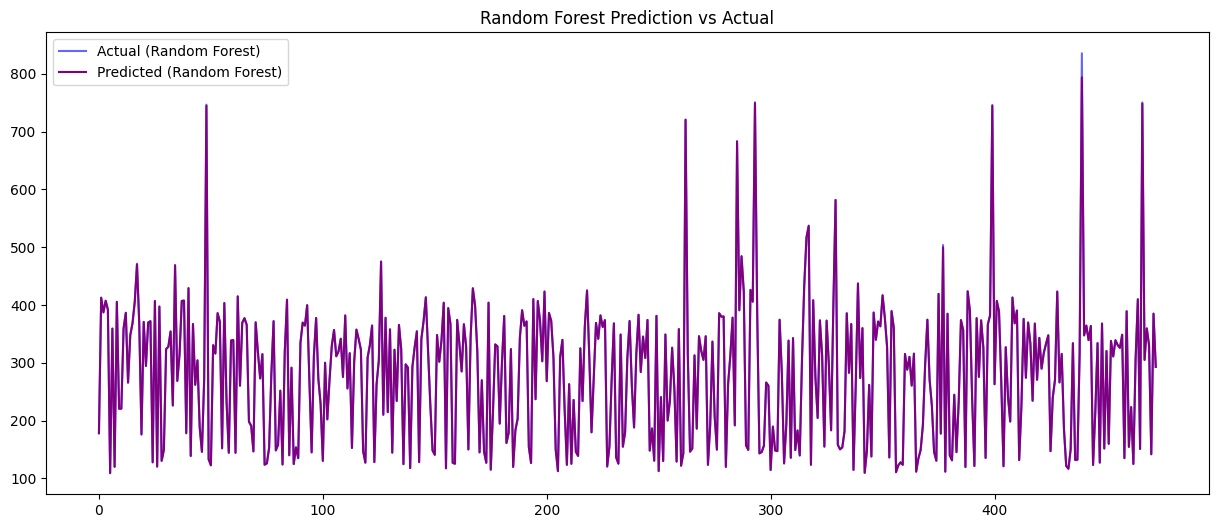

In [ ]:
import matplotlib.pyplot as plt

y_lstm_test_inv = scaler.inverse_transform(np.concatenate([y_lstm_test.reshape(-1, 1),
                                                           np.zeros((len(y_lstm_test), len(features) - 1))], axis=1))[:, 0]
lstm_pred_inv = scaler.inverse_transform(np.concatenate([lstm_pred,
                                                         np.zeros((len(lstm_pred), len(features) - 1))], axis=1))[:, 0]

y_test_inv = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1),
                                                      np.zeros((len(y_test), len(features) - 1))], axis=1))[:, 0]
xgb_pred_inv = scaler.inverse_transform(np.concatenate([xgb_pred.reshape(-1, 1),
                                                        np.zeros((len(xgb_pred), len(features) - 1))], axis=1))[:, 0]
rf_pred_inv = scaler.inverse_transform(np.concatenate([rf_pred.reshape(-1, 1),
                                                       np.zeros((len(rf_pred), len(features) - 1))], axis=1))[:, 0]

plt.figure(figsize=(15, 6))
plt.plot(y_lstm_test_inv, label="Actual (LSTM)", color='blue', alpha=0.6)
plt.plot(lstm_pred_inv, label="Predicted (LSTM)", color='red')
plt.title("LSTM Prediction vs Actual")
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(y_test_inv, label="Actual (XGBoost)", color='blue', alpha=0.6)
plt.plot(xgb_pred_inv, label="Predicted (XGBoost)", color='green')
plt.title("XGBoost Prediction vs Actual")
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(y_test_inv, label="Actual (Random Forest)", color='blue', alpha=0.6)
plt.plot(rf_pred_inv, label="Predicted (Random Forest)", color='purple')
plt.title("Random Forest Prediction vs Actual")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [ ]:
mae_lstm = mean_absolute_error(y_lstm_test, lstm_pred)
r2_lstm = r2_score(y_lstm_test, lstm_pred)

In [ ]:
mae_xgb = mean_absolute_error(y_test, xgb_pred)
r2_xgb = r2_score(y_test, xgb_pred)

In [ ]:
mae_rf = mean_absolute_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)

In [ ]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['LSTM', 'XGBoost', 'Random Forest'],
    'MSE': [lstm_mse, xgb_mse, rf_mse],
    'RMSE': [np.sqrt(lstm_mse), np.sqrt(xgb_mse), np.sqrt(rf_mse)],
    'MAE': [mae_lstm, mae_xgb, mae_rf],
    'R² Score': [r2_lstm, r2_xgb, r2_rf]
})

results = results.round(4)

print("Enhanced Model Comparison Table:\n")
print(results)


Enhanced Model Comparison Table:

           Model     MSE    RMSE     MAE  R² Score
0           LSTM  0.0017  0.0411  0.0296    0.9418
1        XGBoost  0.0000  0.0058  0.0013    0.9987
2  Random Forest  0.0000  0.0027  0.0004    0.9997


Total Return: 29008146280.29%
Sharpe Ratio: 8.12


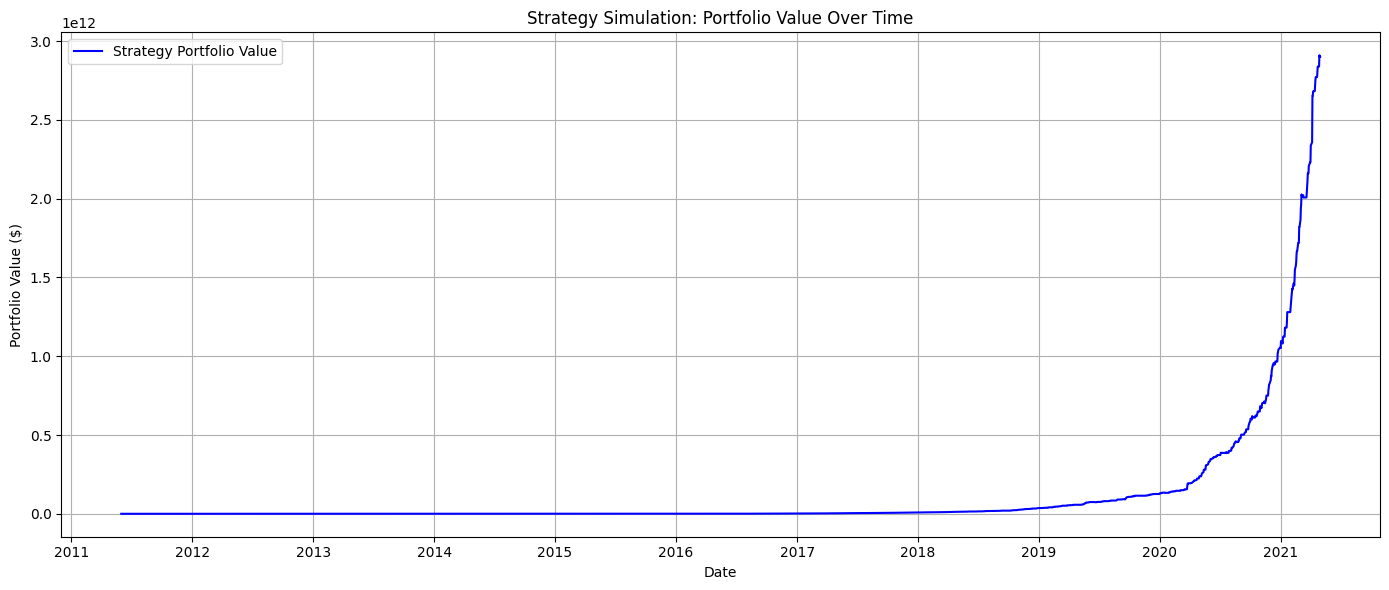

In [50]:
df['Future_Close'] = df['Close'].shift(-1)
df['Price_Change'] = (df['Future_Close'] - df['Close']) / df['Close']

df['Signal'] = np.select(
    [df['Price_Change'] > 0.01, df['Price_Change'] < -0.01],
    [1, -1],
    default=0
)

df.dropna(inplace=True)

initial_cash = 10000
cash = initial_cash
position = 0
portfolio_values = []

for i, row in df.iterrows():
    price = row['Close']
    signal = row['Signal']

    if signal == 1 and cash >= price:
        position = cash // price
        cash -= position * price

    elif signal == -1 and position > 0:
        cash += position * price
        position = 0

    portfolio_value = cash + (position * price)
    portfolio_values.append(portfolio_value)

df['Portfolio_Value'] = portfolio_values

returns = pd.Series(portfolio_values).pct_change().dropna()
total_return = (portfolio_values[-1] - initial_cash) / initial_cash
sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)

print(f"Total Return: {total_return*100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Portfolio_Value'], label='Strategy Portfolio Value', color='blue')
plt.title("Strategy Simulation: Portfolio Value Over Time")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

np.random.seed(42)
n_samples = 1000

df = pd.DataFrame({
    'SMA_20': np.random.randn(n_samples),
    'RSI': np.random.uniform(10, 90, size=n_samples),
    'MACD': np.random.randn(n_samples),
    'Volume': np.random.rand(n_samples) * 1000,
    'Signal': np.random.choice([-1, 0, 1], size=n_samples, p=[0.3, 0.4, 0.3])  # Labels
})

X = df.drop('Signal', axis=1)
y = df['Signal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.26      0.17      0.20        59
           0       0.40      0.54      0.46        78
           1       0.27      0.24      0.25        63

    accuracy                           0.34       200
   macro avg       0.31      0.32      0.30       200
weighted avg       0.32      0.34      0.32       200



In [42]:
df['Date'] = pd.to_datetime(df['Date'])

In [44]:
df['Year'] = df['Date'].dt.year

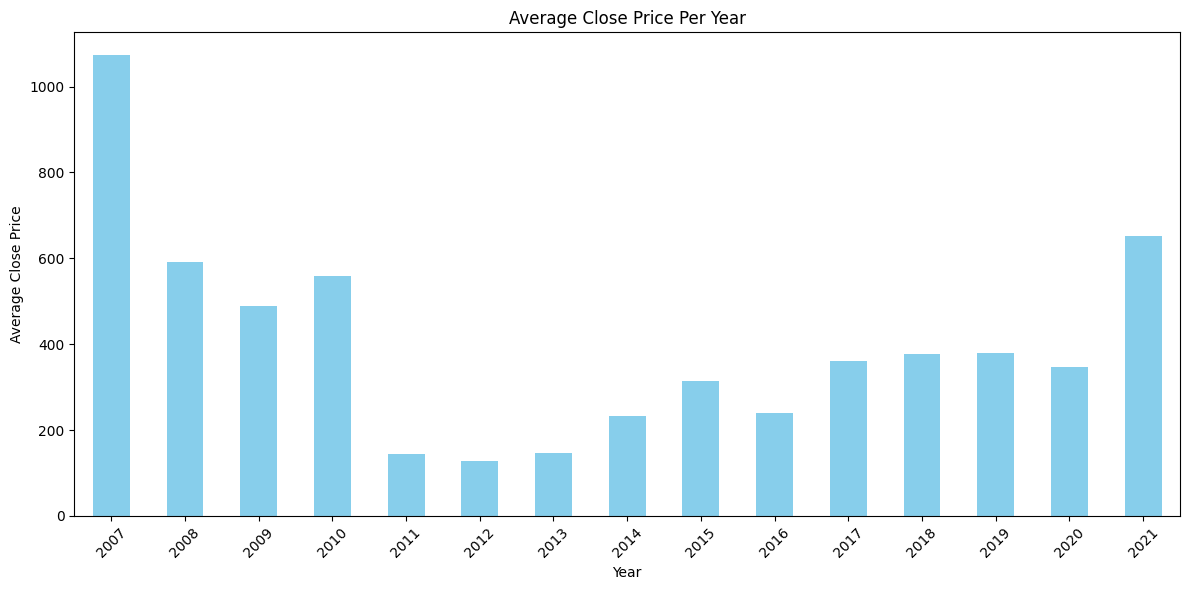

In [45]:
avg_close_per_year = df.groupby('Year')['Close'].mean()

plt.figure(figsize=(12, 6))
avg_close_per_year.plot(kind='bar', color='skyblue')
plt.title("Average Close Price Per Year")
plt.ylabel("Average Close Price")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


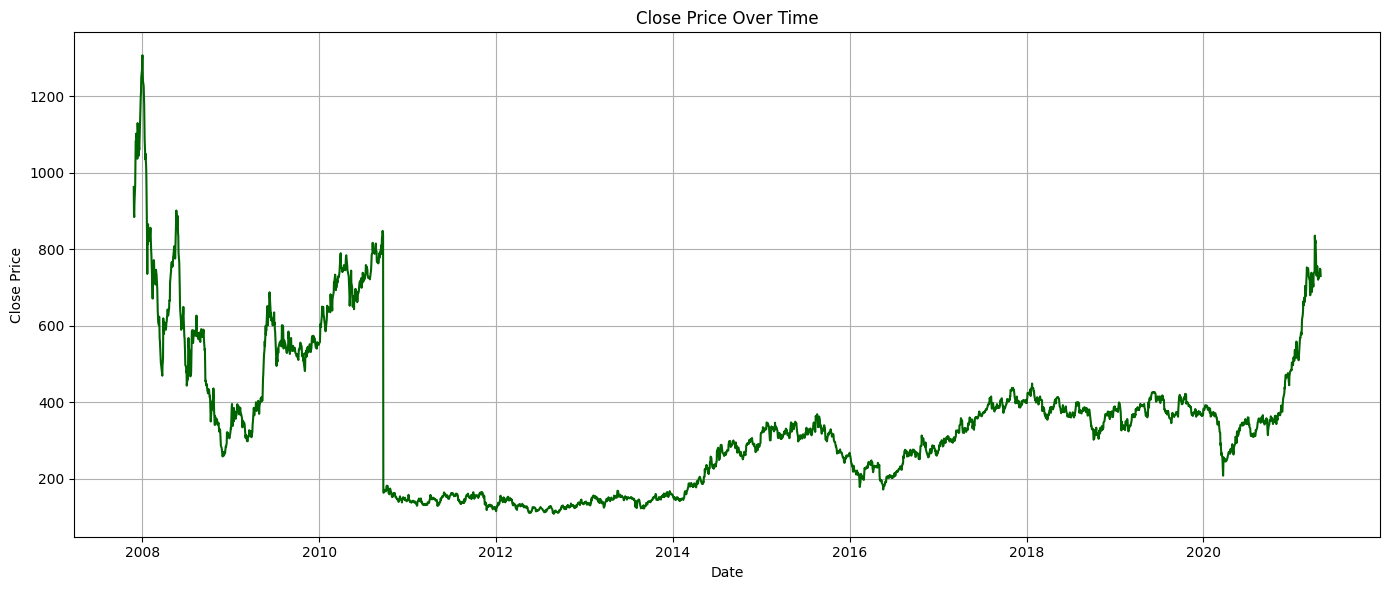

In [46]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='darkgreen')
plt.title("Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.tight_layout()
plt.show()

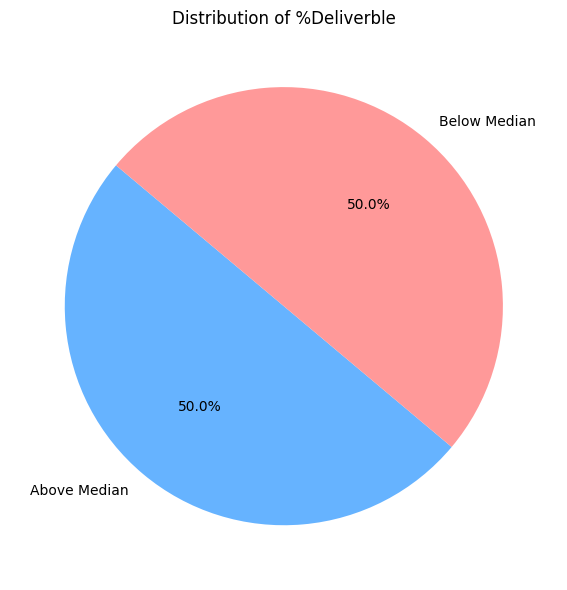

In [47]:
median_deliverable = df['%Deliverble'].median()
above_median = (df['%Deliverble'] > median_deliverable).sum()
below_median = (df['%Deliverble'] <= median_deliverable).sum()

plt.figure(figsize=(6, 6))
plt.pie([above_median, below_median], labels=['Above Median', 'Below Median'], autopct='%1.1f%%',
        colors=['#66b3ff', '#ff9999'], startangle=140)
plt.title("Distribution of %Deliverble")
plt.tight_layout()
plt.show()

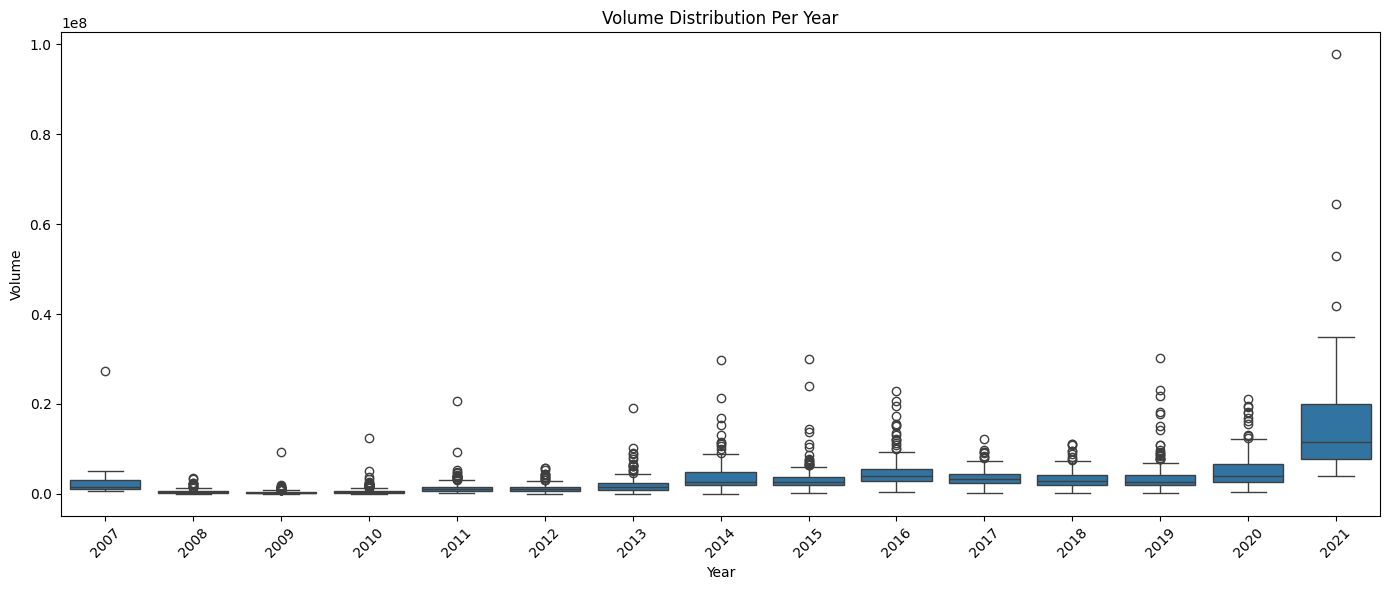

In [48]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Year', y='Volume', data=df)
plt.title("Volume Distribution Per Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-43-1496652514>:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar")


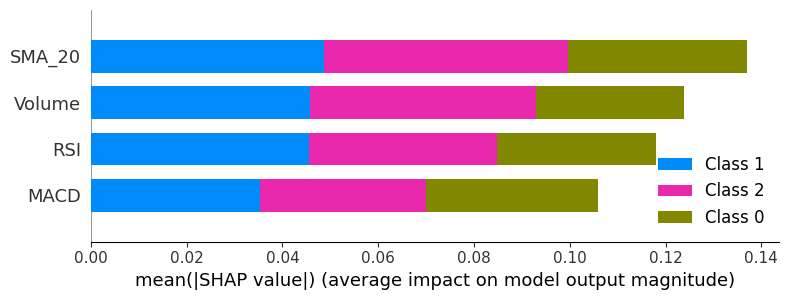

<ipython-input-43-1496652514>:7: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:726: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:746: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:746: FutureWarni

<Figure size 640x480 with 0 Axes>

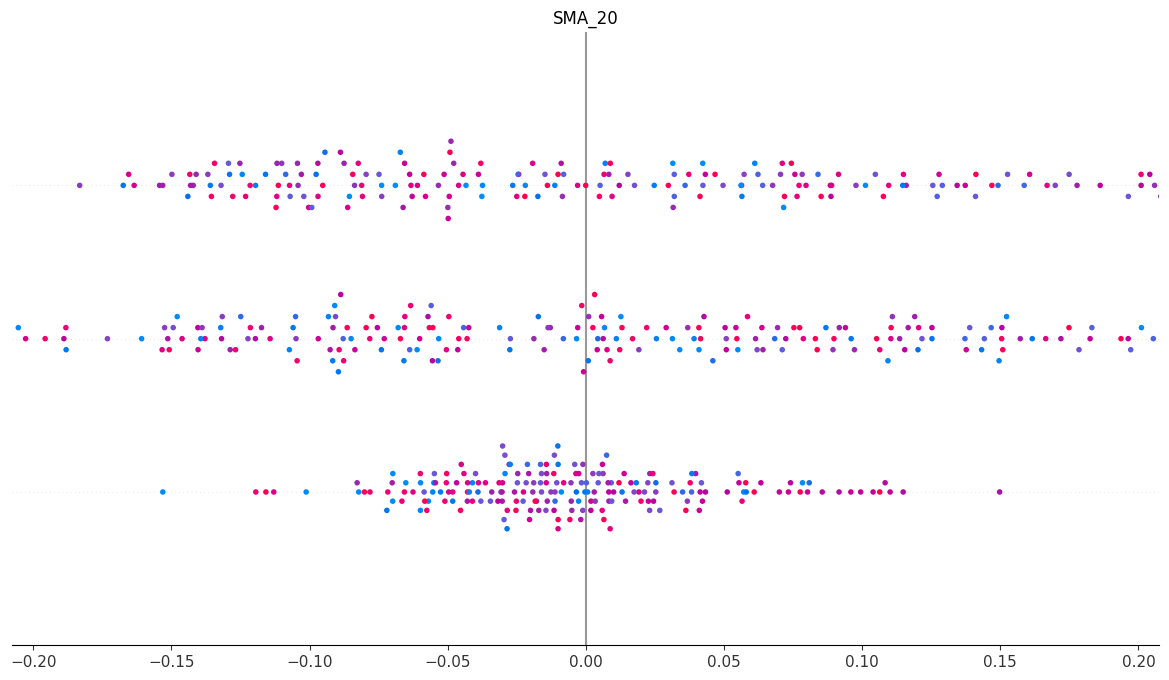

In [ ]:
import shap

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)


In [ ]:
!pip install lime

import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=["Sell", "Hold", "Buy"],
    mode='classification'
)

i = 1
exp = explainer.explain_instance(X_test.iloc[i].values, clf.predict_proba)
exp.show_in_notebook(show_all=False)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=11f66f2740bcccf2eefcde557841f042b343cf20911cb185e7dd8d2c574d166a
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
np.random.seed(42)
n_samples = 1000
df = pd.DataFrame({
    'SMA_20': np.random.randn(n_samples),
    'RSI': np.random.uniform(10, 90, size=n_samples),
    'MACD': np.random.randn(n_samples),
    'Volume': np.random.rand(n_samples) * 1000,
    'Close': np.random.uniform(100, 200, size=n_samples),
    'Signal': np.random.choice([-1, 0, 1], size=n_samples, p=[0.3, 0.4, 0.3])
})

X = df[['SMA_20', 'RSI', 'MACD', 'Volume']]
y = df['Signal']
X_train, X_test, y_train, y_test, close_train, close_test = train_test_split(X, y, df['Close'], test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

initial_cash = 10000
cash = initial_cash
position = 0
portfolio_values = []

for i in range(len(y_pred)):
    price = close_test.iloc[i]
    signal = y_pred[i]

    if signal == 1 and cash >= price:
        position = cash // price
        cash -= position * price
    elif signal == -1 and position > 0:
        cash += position * price
        position = 0

    portfolio_value = cash + (position * price)
    portfolio_values.append(portfolio_value)

returns = pd.Series(portfolio_values).pct_change().dropna()
total_return = (portfolio_values[-1] - initial_cash) / initial_cash
sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)

print("Final Portfolio Value:", round(portfolio_values[-1], 2))
print("Total Return: {:.2f}%".format(total_return * 100))
print("Sharpe Ratio:", round(sharpe_ratio, 2))

Final Portfolio Value: 232.32
Total Return: -97.68%
Sharpe Ratio: 0.92


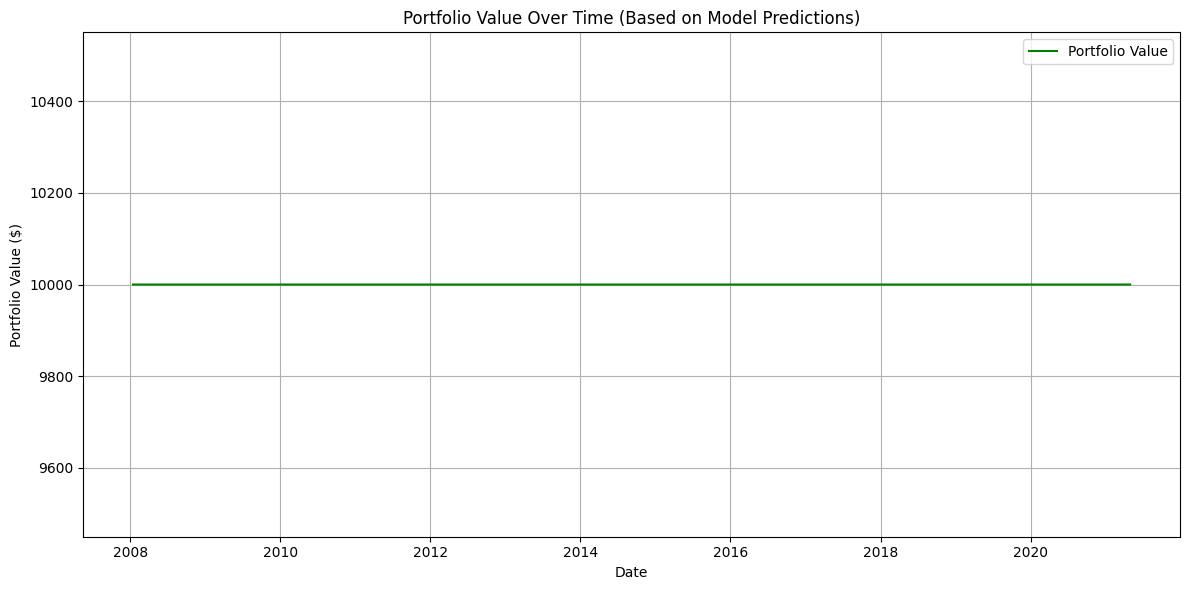

In [ ]:
df = pd.read_csv("/content/ADANIPORTS (1).csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

close_prices = df['Close']
df['SMA_20'] = ta.trend.sma_indicator(close_prices, window=20)
df['RSI'] = ta.momentum.rsi(close_prices, window=14)
df['MACD'] = ta.trend.macd_diff(close_prices)

if 'Volume' in df.columns and 'Volume' in clf.feature_names_in_:
    features = ['SMA_20', 'RSI', 'MACD', 'Volume']
    X_data = df[features]
elif 'Volume' not in clf.feature_names_in_:
     features = ['SMA_20', 'RSI', 'MACD']
     X_data = df[features]
else:

    print("Warning: Mismatch in features used for training and available in data.")
    print("Features used for training:", clf.feature_names_in_)
    print("Features available in data:", df.columns)
    features = clf.feature_names_in_
    X_data = df[features]

df.dropna(subset=features, inplace=True)
X_data = df[features]

try:
    df['Predicted_Signal'] = clf.predict(X_data)
except NameError:
    print("Error: The classifier 'clf' was not found. Please ensure the cell training the RandomForestClassifier was run.")

    exit()


initial_cash = 10000
cash = initial_cash
position = 0
portfolio_values = []


for i, row in df.iterrows():
    price = row['Close']
    signal = row['Predicted_Signal']

    if signal == 1 and cash >= price:

        position = cash // price
        cash -= position * price

    elif signal == -1 and position > 0:

        cash += position * price
        position = 0


    portfolio_value = cash + (position * price)
    portfolio_values.append(portfolio_value)

df['Portfolio_Value'] = portfolio_values

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Portfolio_Value'], label='Portfolio Value', color='green')
plt.title('Portfolio Value Over Time (Based on Model Predictions)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
df['Portfolio_Return'] = df['Portfolio_Value'].pct_change()

returns = df['Portfolio_Return'].dropna()

total_return = (df['Portfolio_Value'].iloc[-1] - df['Portfolio_Value'].iloc[0]) / df['Portfolio_Value'].iloc[0] * 100

sharpe_ratio = (returns.mean() / returns.std()) * np.sqrt(252)

print("Final Portfolio Value: ${:.2f}".format(df['Portfolio_Value'].iloc[-1]))
print("Total Return: {:.2f}%".format(total_return))
print("Sharpe Ratio: {:.2f}".format(sharpe_ratio))


Final Portfolio Value: $10000.00
Total Return: 0.00%
Sharpe Ratio: nan


<ipython-input-52-2275822351>:7: RuntimeWarning: invalid value encountered in scalar divide
  sharpe_ratio = (returns.mean() / returns.std()) * np.sqrt(252)


In [ ]:
!pip install newsapi-python
!pip install nltk

In [5]:
import pandas as pd

df = pd.read_csv("/content/ADANIPORTS (1).csv")

df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values('Date').reset_index(drop=True)

print(df.columns)


Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


In [7]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=9f5b808c8945a0ea70e394d8c91cb7b731213514537654e9b0affb807ceb339c
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [8]:
import pandas as pd
import numpy as np
import ta  # Technical Analysis library

df = pd.read_csv("/content/ADANIPORTS (1).csv")

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

df['SMA_20'] = ta.trend.sma_indicator(df['Close'], window=20)
df['EMA_20'] = ta.trend.ema_indicator(df['Close'], window=20)
df['RSI'] = ta.momentum.rsi(df['Close'], window=14)
df['MACD'] = ta.trend.macd_diff(df['Close'])

bb = ta.volatility.BollingerBands(df['Close'], window=20, window_dev=2)
df['BB_Upper'] = bb.bollinger_hband()
df['BB_Lower'] = bb.bollinger_lband()

df['OBV'] = ta.volume.on_balance_volume(df['Close'], df['Volume'])


df['Chaikin'] = ta.volume.chaikin_money_flow(df['High'], df['Low'], df['Close'], df['Volume'], window=20)

df.dropna(inplace=True)

df['Target_Regression'] = df['Close'].shift(-1)

threshold = 0.01
df['Return_pct'] = df['Close'].pct_change().shift(-1)

df['Signal'] = 0
df.loc[df['Return_pct'] > threshold, 'Signal'] = 1
df.loc[df['Return_pct'] < -threshold, 'Signal'] = -1

df.dropna(inplace=True)

print(df[['Date', 'Close', 'SMA_20', 'EMA_20', 'RSI', 'MACD', 'OBV', 'Chaikin',
          'BB_Upper', 'BB_Lower', 'Target_Regression', 'Signal']].head())


          Date   Close    SMA_20      EMA_20        RSI      MACD       OBV  \
866 2011-06-01  164.00  144.8950  149.385202  71.576291  2.128335  88605684   
867 2011-06-02  161.25  146.5300  150.515182  66.729148  1.945501  86906386   
868 2011-06-03  161.05  147.9875  151.518498  66.377088  1.685840  85720569   
869 2011-06-06  159.85  149.4550  152.311975  64.188840  1.323977  85174191   
870 2011-06-07  157.25  150.5375  152.782263  59.603936  0.824664  82980725   

      Chaikin    BB_Upper    BB_Lower  Target_Regression  Signal  
866  0.144189  165.384434  124.405566             161.25      -1  
867  0.158648  166.758430  126.301570             161.05       0  
868  0.139591  167.988772  127.986228             159.85       0  
869  0.169779  168.386928  130.523072             157.25      -1  
870  0.119491  168.634209  132.440791             154.90      -1  


In [11]:
df['Target_Regression'] = df['Close'].shift(-1)
df.dropna(inplace=True)
print(df[['Date', 'Close', 'Target_Regression']].head())

          Date   Close  Target_Regression
866 2011-06-01  164.00             161.25
867 2011-06-02  161.25             161.05
868 2011-06-03  161.05             159.85
869 2011-06-06  159.85             157.25
870 2011-06-07  157.25             154.90


In [13]:
threshold = 0.01

df['Return_pct'] = df['Close'].pct_change().shift(-1)
df['Signal'] = 0

df.loc[df['Return_pct'] > threshold, 'Signal'] = 1
df.loc[df['Return_pct'] < -threshold, 'Signal'] = -1

df.dropna(inplace=True)
print(df[['Date', 'Close', 'Signal']].head())

          Date   Close  Signal
866 2011-06-01  164.00      -1
867 2011-06-02  161.25       0
868 2011-06-03  161.05       0
869 2011-06-06  159.85      -1
870 2011-06-07  157.25      -1


In [14]:
print(df[['Date', 'Close', 'SMA_20', 'EMA_20', 'RSI', 'MACD',
          'BB_Upper', 'BB_Lower', 'OBV', 'Chaikin', 'Target_Regression', 'Signal']].head())

          Date   Close    SMA_20      EMA_20        RSI      MACD    BB_Upper  \
866 2011-06-01  164.00  144.8950  149.385202  71.576291  2.128335  165.384434   
867 2011-06-02  161.25  146.5300  150.515182  66.729148  1.945501  166.758430   
868 2011-06-03  161.05  147.9875  151.518498  66.377088  1.685840  167.988772   
869 2011-06-06  159.85  149.4550  152.311975  64.188840  1.323977  168.386928   
870 2011-06-07  157.25  150.5375  152.782263  59.603936  0.824664  168.634209   

       BB_Lower       OBV   Chaikin  Target_Regression  Signal  
866  124.405566  88605684  0.144189             161.25      -1  
867  126.301570  86906386  0.158648             161.05       0  
868  127.986228  85720569  0.139591             159.85       0  
869  130.523072  85174191  0.169779             157.25      -1  
870  132.440791  82980725  0.119491             154.90      -1  


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

feature_cols = [
    'SMA_20', 'EMA_20', 'RSI', 'MACD', 'OBV', 'Chaikin',
    'BB_Upper', 'BB_Lower',
    'lag_1', 'lag_2', 'lag_3', 'RSI_lag1', 'MACD_lag1',
    'rolling_mean_3', 'rolling_mean_7', 'rolling_std_7',
    'rolling_max_7', 'rolling_min_7', 'momentum_7'
]

X = df[feature_cols]
y = df['Signal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.3729508196721312
Classification Report:
               precision    recall  f1-score   support

          -1       0.25      0.33      0.28       128
           0       0.47      0.52      0.49       219
           1       0.33      0.18      0.24       141

    accuracy                           0.37       488
   macro avg       0.35      0.34      0.34       488
weighted avg       0.37      0.37      0.36       488

Confusion Matrix:
 [[ 42  68  18]
 [ 71 114  34]
 [ 55  60  26]]


In [16]:
df['lag_1'] = df['Close'].shift(1)
df['lag_2'] = df['Close'].shift(2)
df['lag_3'] = df['Close'].shift(3)
df['lag_4'] = df['Close'].shift(4)
df['lag_5'] = df['Close'].shift(5)
df['RSI_lag1'] = df['RSI'].shift(1)
df['MACD_lag1'] = df['MACD'].shift(1)

df['rolling_mean_3'] = df['Close'].rolling(window=3).mean()
df['rolling_mean_7'] = df['Close'].rolling(window=7).mean()
df['rolling_std_7'] = df['Close'].rolling(window=7).std()  # Volatility
df['rolling_max_7'] = df['Close'].rolling(window=7).max()
df['rolling_min_7'] = df['Close'].rolling(window=7).min()

df['momentum_7'] = df['Close'] - df['rolling_mean_7']

df.dropna(inplace=True)

print(df[['Date', 'Close', 'lag_1', 'rolling_mean_3', 'momentum_7']].head())


          Date   Close   lag_1  rolling_mean_3  momentum_7
878 2011-06-17  148.20  151.55      151.333333   -4.978571
879 2011-06-20  147.15  148.20      148.966667   -4.914286
880 2011-06-21  148.35  147.15      147.900000   -3.192857
881 2011-06-22  148.10  148.35      147.866667   -2.492857
882 2011-06-23  150.15  148.10      148.866667    0.471429


<ipython-input-19-4248879053>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')


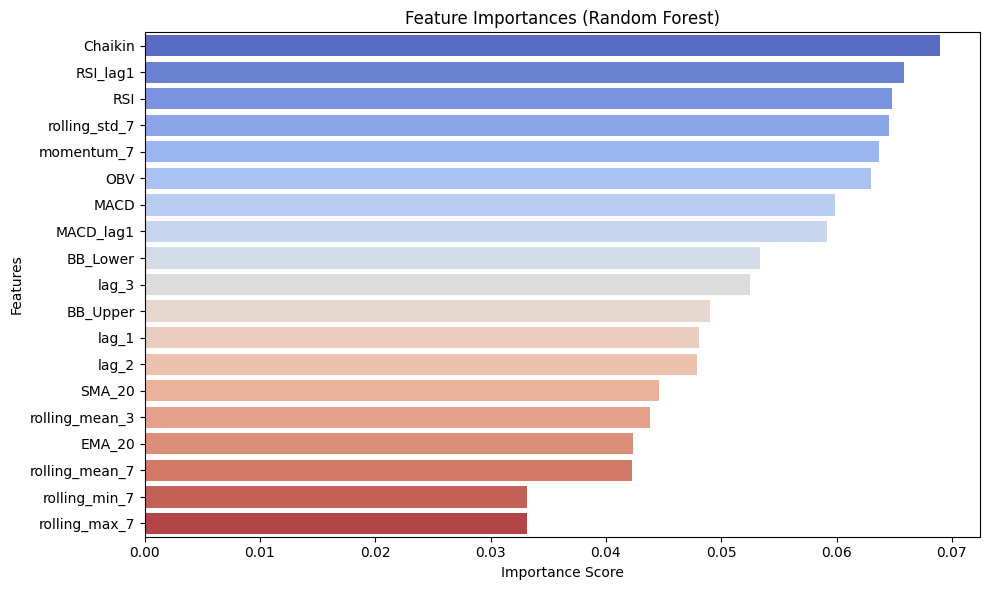

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

<ipython-input-20-2006385811>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=log_importance, x='Importance', y='Feature', palette='crest')


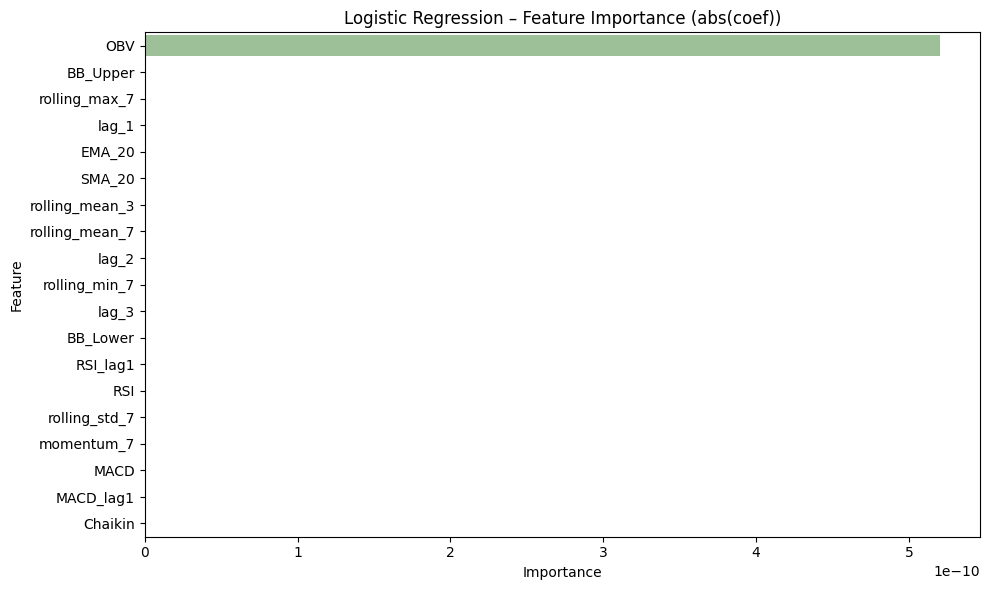

In [20]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

coefs = np.abs(log_model.coef_[0])

log_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': coefs
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=log_importance, x='Importance', y='Feature', palette='crest')
plt.title("Logistic Regression – Feature Importance (abs(coef))")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:15:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


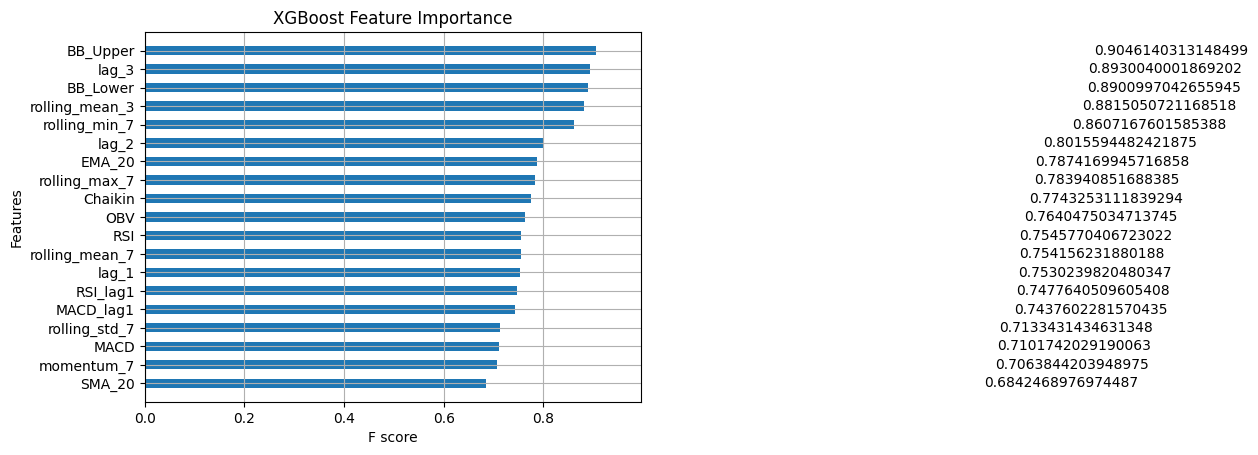

In [22]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

label_mapping = {-1: 0, 0: 1, 1: 2}
y_train_encoded = y_train.map(label_mapping)
y_test_encoded = y_test.map(label_mapping)

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

xgb_model.fit(X_train, y_train_encoded)

xgb.plot_importance(xgb_model, importance_type='gain', title='XGBoost Feature Importance', height=0.5)
plt.show()

In [29]:
df = pd.read_csv("/content/ADANIPORTS (1).csv")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:24:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 XGBoost Model Evaluation:
Accuracy: 0.3869653767820774
Classification Report:
               precision    recall  f1-score   support

          -1       0.21      0.13      0.16       128
           0       0.43      0.70      0.53       221
           1       0.35      0.13      0.19       142

    accuracy                           0.39       491
   macro avg       0.33      0.32      0.30       491
weighted avg       0.35      0.39      0.34       491

Confusion Matrix:
 [[ 17 101  10]
 [ 42 154  25]
 [ 23 100  19]]


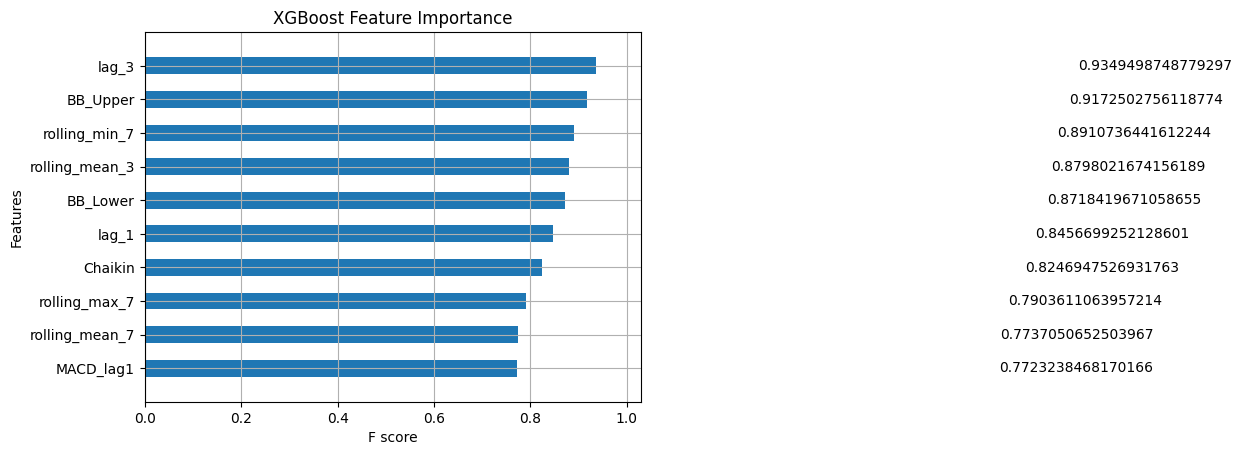

<ipython-input-33-1854303590>:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df_xgb_plot, palette='viridis')


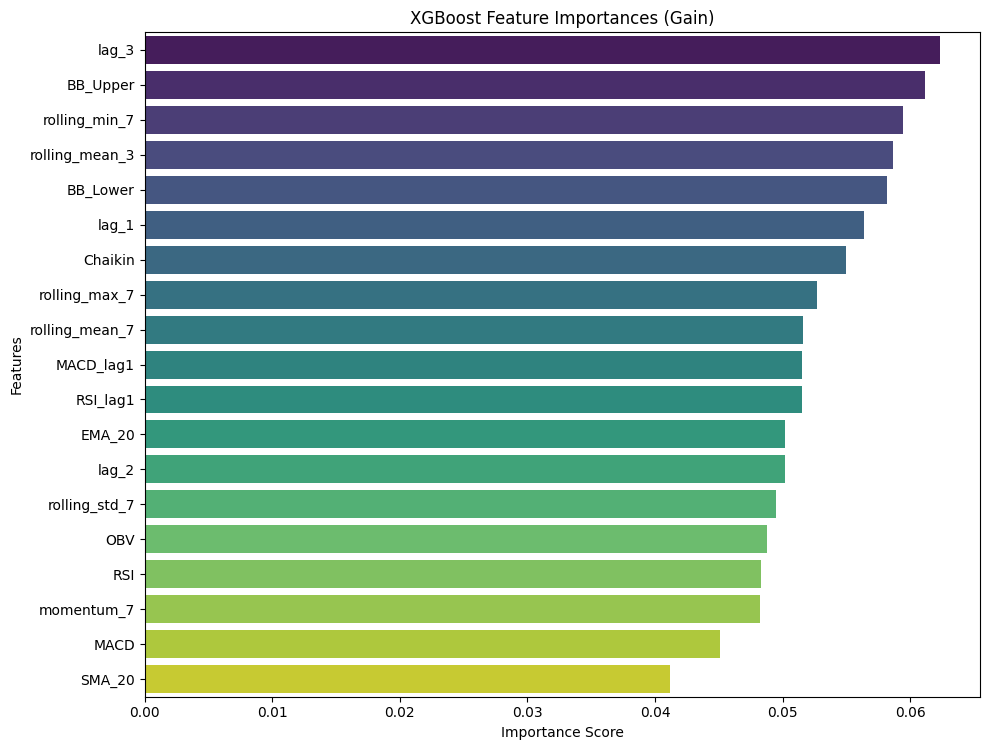

In [33]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

df['SMA_20'] = ta.trend.sma_indicator(df['Close'], window=20)
df['EMA_20'] = ta.trend.ema_indicator(df['Close'], window=20)
df['RSI'] = ta.momentum.rsi(df['Close'], window=14)
df['MACD'] = ta.trend.macd_diff(df['Close'])

bb = ta.volatility.BollingerBands(df['Close'], window=20, window_dev=2)
df['BB_Upper'] = bb.bollinger_hband()
df['BB_Lower'] = bb.bollinger_lband()

df['OBV'] = ta.volume.on_balance_volume(df['Close'], df['Volume'])

df['Chaikin'] = ta.volume.chaikin_money_flow(df['High'], df['Low'], df['Close'], df['Volume'], window=20)

df['lag_1'] = df['Close'].shift(1)
df['lag_2'] = df['Close'].shift(2)
df['lag_3'] = df['Close'].shift(3)
df['RSI_lag1'] = df['RSI'].shift(1)
df['MACD_lag1'] = df['MACD'].shift(1)

df['rolling_mean_3'] = df['Close'].rolling(window=3).mean()
df['rolling_mean_7'] = df['Close'].rolling(window=7).mean()
df['rolling_std_7'] = df['Close'].rolling(window=7).std()
df['rolling_max_7'] = df['Close'].rolling(window=7).max()
df['rolling_min_7'] = df['Close'].rolling(window=7).min()
df['momentum_7'] = df['Close'] - df['rolling_mean_7']


threshold = 0.01

df['Return_pct'] = df['Close'].pct_change().shift(-1)
df['Signal'] = 0

df.loc[df['Return_pct'] > threshold, 'Signal'] = 1
df.loc[df['Return_pct'] < -threshold, 'Signal'] = -1

df.dropna(inplace=True)

label_mapping = {-1: 0, 0: 1, 1: 2}
df['Signal_encoded'] = df['Signal'].map(label_mapping)

feature_cols = [
    'SMA_20', 'EMA_20', 'RSI', 'MACD', 'OBV', 'Chaikin',
    'BB_Upper', 'BB_Lower',
    'lag_1', 'lag_2', 'lag_3', 'RSI_lag1', 'MACD_lag1',
    'rolling_mean_3', 'rolling_mean_7', 'rolling_std_7',
    'rolling_max_7', 'rolling_min_7', 'momentum_7'
]

missing_cols = [col for col in feature_cols if col not in df.columns]
if missing_cols:
    print(f"Warning: Missing features in DataFrame after processing: {missing_cols}")


X = df[feature_cols]
y = df['Signal_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

y_pred_encoded = xgb_model.predict(X_test)

reverse_label_mapping = {v: k for k, v in label_mapping.items()}
y_test_original = pd.Series(y_test.values).map(reverse_label_mapping)
y_pred = pd.Series(y_pred_encoded).map(reverse_label_mapping)


print("\n XGBoost Model Evaluation:")
print("Accuracy:", accuracy_score(y_test_original, y_pred))
print("Classification Report:\n", classification_report(y_test_original, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_original, y_pred, labels=[-1, 0, 1]))

xgb.plot_importance(xgb_model, importance_type='gain', title='XGBoost Feature Importance', height=0.5, max_num_features=10)
plt.show()

importances = xgb_model.feature_importances_
feature_importance_df_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

num_features_to_plot = 20
feature_importance_df_xgb_plot = feature_importance_df_xgb.head(num_features_to_plot)
plot_height = max(4, len(feature_importance_df_xgb_plot) * 0.4)

plt.figure(figsize=(10, plot_height))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_xgb_plot, palette='viridis')
plt.title("XGBoost Feature Importances (Gain)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

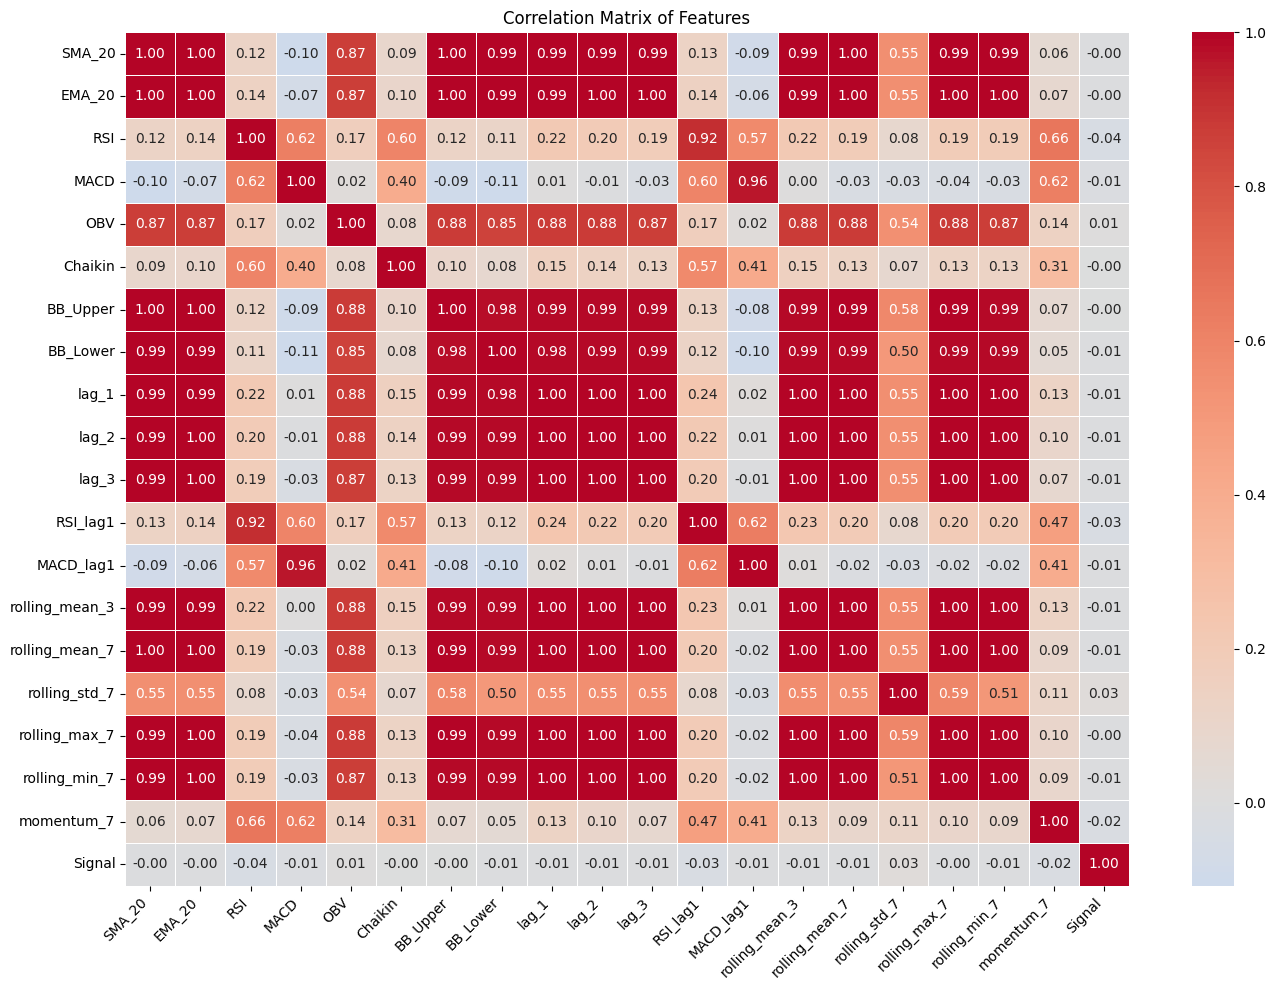

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_features = [
    'SMA_20', 'EMA_20', 'RSI', 'MACD', 'OBV', 'Chaikin',
    'BB_Upper', 'BB_Lower',
    'lag_1', 'lag_2', 'lag_3',
    'RSI_lag1', 'MACD_lag1',
    'rolling_mean_3', 'rolling_mean_7',
    'rolling_std_7', 'rolling_max_7',
    'rolling_min_7', 'momentum_7',
    'Signal'
]

corr_matrix = df[correlation_features].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [35]:
missing = [col for col in correlation_features if col not in df.columns]
print("Missing columns from your CSV:", missing)

Missing columns from your CSV: []


In [61]:
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi
    df['RSI'] = calculate_rsi(df['Close'])

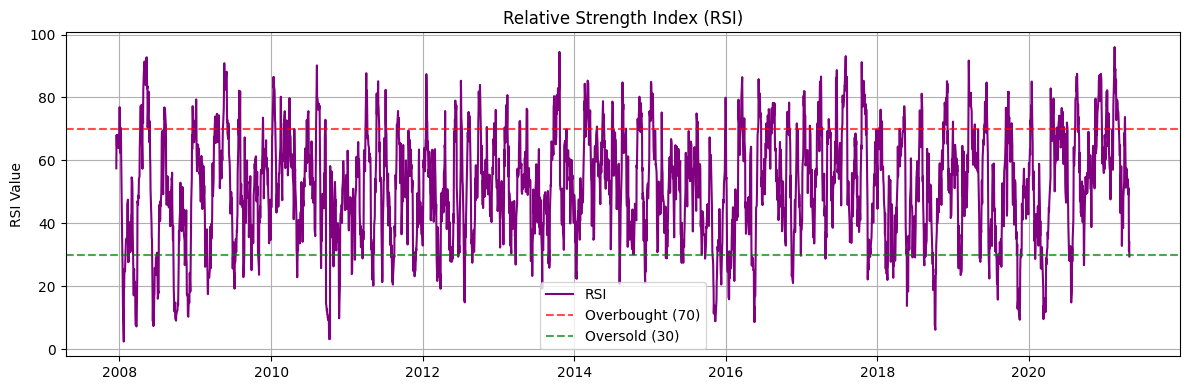

In [62]:
plt.figure(figsize=(12, 4))
plt.plot(df['RSI'], color='purple', label='RSI')
plt.axhline(70, color='red', linestyle='--', alpha=0.7, label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', alpha=0.7, label='Oversold (30)')
plt.title("Relative Strength Index (RSI)")
plt.ylabel("RSI Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [63]:
short_ema = df['Close'].ewm(span=12, adjust=False).mean()
long_ema = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = short_ema - long_ema

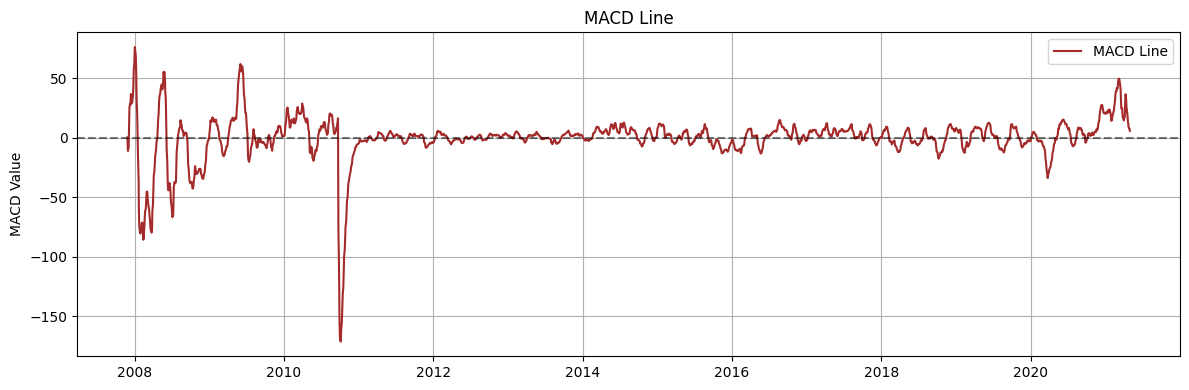

In [64]:
plt.figure(figsize=(12, 4))
plt.plot(df['MACD'], color='brown', label='MACD Line')
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.title("MACD Line")
plt.ylabel("MACD Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Available years after preprocessing: [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

 Randomly selected prediction year: 2010


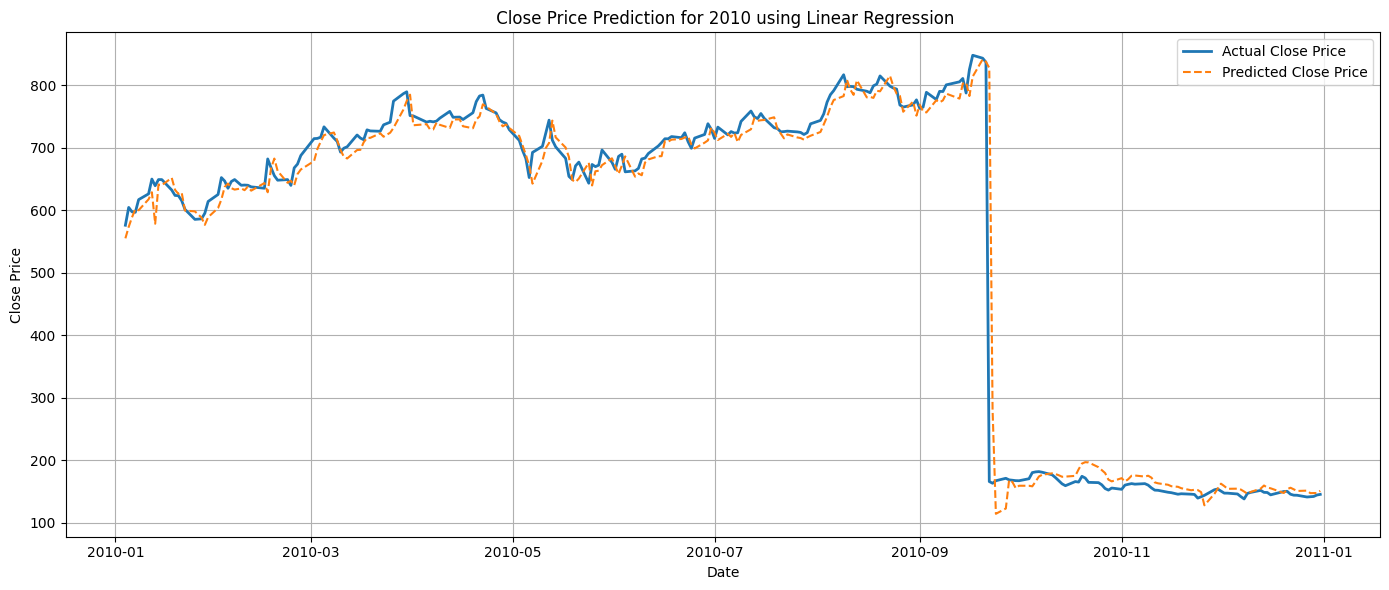


 Sample Predictions:
        Date  Actual   Predicted
0 2010-01-04  575.95  554.997738
1 2010-01-05  604.50  573.334180
2 2010-01-06  597.35  588.678617
3 2010-01-07  596.65  601.583472
4 2010-01-08  616.95  599.989810
5 2010-01-11  626.20  617.477535
6 2010-01-12  649.85  628.755604
7 2010-01-13  639.20  578.396689
8 2010-01-14  649.05  641.199575
9 2010-01-15  649.05  640.138103


In [76]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import random

df = pd.read_csv("/content/ADANIPORTS (1).csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['EMA_20'] = df['Close'].ewm(span=20).mean()
df['Lag_1'] = df['Close'].shift(1)
df['Lag_2'] = df['Close'].shift(2)
df['Lag_3'] = df['Close'].shift(3)
df['Target'] = df['Close'].shift(-1)

df.dropna(inplace=True)

available_years = df.index.year.unique().tolist()
print("Available years after preprocessing:", available_years)

target_year = random.choice(available_years)
print(f"\n Randomly selected prediction year: {target_year}")


train_df = df[df.index.year < target_year]
test_df = df[df.index.year == target_year]

if test_df.empty or train_df.empty:
    print(f"Not enough data for year {target_year}. Try running again.")
else:
    features = ['Open', 'High', 'Low', 'Volume', 'SMA_20', 'EMA_20', 'Lag_1', 'Lag_2', 'Lag_3']
    X_train = train_df[features]
    y_train = train_df['Target']
    X_test = test_df[features]
    y_test = test_df['Target']

    model = LinearRegression()
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)

    plt.figure(figsize=(14, 6))
    plt.plot(test_df.index, y_test, label='Actual Close Price', linewidth=2)
    plt.plot(test_df.index, y_pred, label='Predicted Close Price', linestyle='--')
    plt.title(f" Close Price Prediction for {target_year} using Linear Regression")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    result_df = pd.DataFrame({
        'Date': test_df.index,
        'Actual': y_test.values,
        'Predicted': y_pred
    })
    print("\n Sample Predictions:")
    print(result_df.head(10))
